In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


#TASK 1
data = pd.read_csv('WISDM_.csv')
data = data.dropna(subset=['X', 'Y', 'Z'])  # since missing are in X , Y , Z only so drop them

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['User_ID'] = data['User_ID'].astype('category')
data['Z'] = data['Z'].str.replace(r'[^\d.-]+', '', regex=True)
data['Z'] = data['Z'].str.replace(';', '', regex=False) # Remove semicolons from 'Z' column

data['X'] = data['X'].astype(float)
data['Y'] = data['Y'].astype(float)
data['Z'] = data['Z'].astype(float)

data = data.dropna(subset=['X', 'Y', 'Z'])

# z - score normalization = [ x - mean ] / [ std dev ]
columns = ['X', 'Y', 'Z'] # Select the columns to normalize
for col in columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

X = data[['X', 'Y', 'Z']] # independent features
Y = data['Activity_Label'] # target var we want to predict

# Splitting
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)
# 20% for testing & 80% for training
# 42 --> make sures that same split happens every time

scaler = StandardScaler() # creates scaler obj for standardization
XTrain = scaler.fit_transform(XTrain) # calculates mean & std dev from training set & normalizes training features
XTest = scaler.transform(XTest) # same as above for testing set

# ABOVE CODEE WAS ALL FROM PREVIOUS TASKS



TASK 5

Accuracy Score: 0.471661403113016


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.00      0.00      0.00     19437
     Jogging       0.51      0.46      0.49     66273
     Sitting       0.29      0.11      0.16     11367
    Standing       0.00      0.00      0.00      9219
    Upstairs       0.00      0.00      0.00     23775
     Walking       0.46      0.83      0.59     82713

    accuracy                           0.47    212784
   macro avg       0.21      0.23      0.21    212784
weighted avg       0.35      0.47      0.39    212784



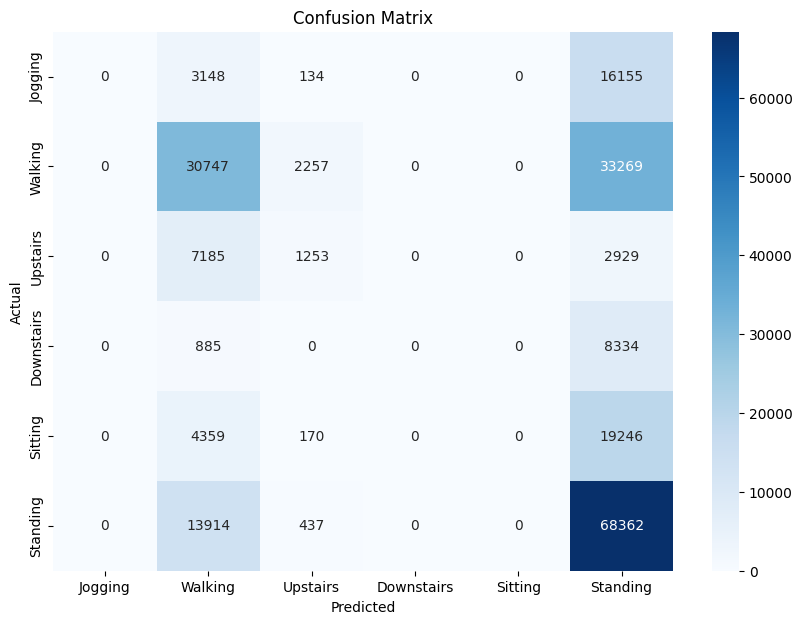

In [3]:
# TASK 5
# TRAINING SVM MODEL
# USING LINEAR KERNEL

# A linear SVM model is created with a regularization parameter C = 1 , random_state = 42 for reproducibility and
# max_iter = 1000 to specify the maximum number of iterations for convergence
# The model is then trained using the fit() method on the training data

SvmLinear = LinearSVC(C=1.0, random_state=42, max_iter=1000)
SvmLinear.fit(XTrain, YTrain)
y_pred = SvmLinear.predict(XTest) # the model makes predictions on test set

print("Accuracy Score:", accuracy_score(YTest, y_pred))
print("Classification Report:\n", classification_report(YTest, y_pred))

CONFUSION_MATRIX = confusion_matrix(YTest, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(CONFUSION_MATRIX, annot=True, fmt='d', cmap='Blues', xticklabels=data['Activity_Label'].unique(), yticklabels=data['Activity_Label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Polynomial Kernel - Accuracy Score: 0.3845448905932777


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Polynomial Kernel - Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.00      0.00      0.00     19437
     Jogging       0.96      0.00      0.00     66273
     Sitting       0.00      0.00      0.00     11367
    Standing       0.00      0.00      0.00      9219
    Upstairs       0.02      0.00      0.00     23775
     Walking       0.40      0.99      0.57     82713

    accuracy                           0.38    212784
   macro avg       0.23      0.17      0.10    212784
weighted avg       0.46      0.38      0.22    212784



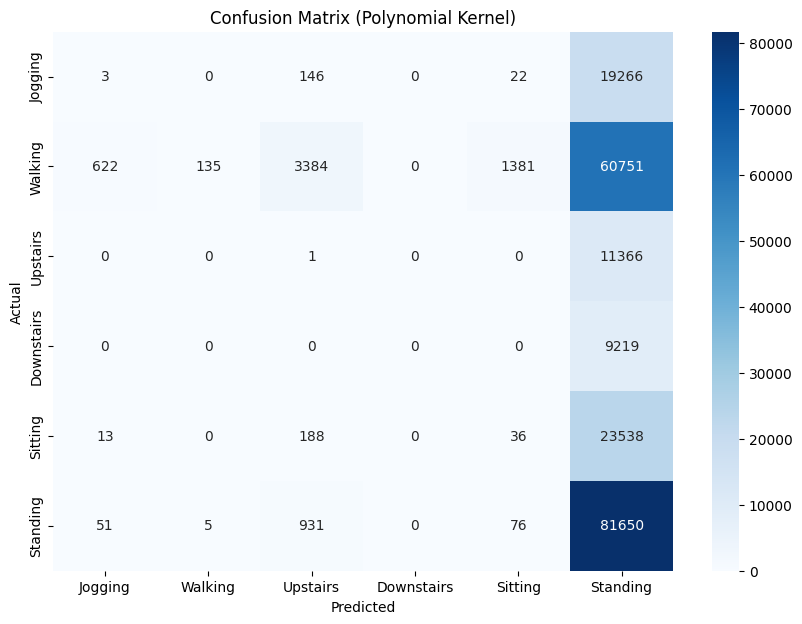

In [5]:
# TRAINING SVM MODEL USING POLYNOMIAL KERNEL

SVM_POLY = make_pipeline(
    PolynomialFeatures(degree=2), # polynomial using degree 2
    StandardScaler(),
    SVC(kernel='poly', C=1.0, random_state=42, max_iter=1000)
)
SVM_POLY.fit(XTrain, YTrain)
y_pred_poly = SVM_POLY.predict(XTest) # predictions on the test set

print("Polynomial Kernel - Accuracy Score:", accuracy_score(YTest, y_pred_poly))
print("Polynomial Kernel - Classification Report:\n", classification_report(YTest, y_pred_poly))

# confusion matrix
CONFUSION_MATRIX = confusion_matrix(YTest, y_pred_poly)
plt.figure(figsize=(10, 7))
sns.heatmap(CONFUSION_MATRIX, annot=True, fmt='d', cmap='Blues', xticklabels=data['Activity_Label'].unique(), yticklabels=data['Activity_Label'].unique())
plt.title('Confusion Matrix (Polynomial Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RBF Kernel - Accuracy Score: 0.40044834198060003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RBF Kernel - Classification Report:
               precision    recall  f1-score   support

  Downstairs       0.04      0.06      0.05     19437
     Jogging       0.56      0.22      0.32     66273
     Sitting       0.00      0.00      0.00     11367
    Standing       0.00      0.00      0.00      9219
    Upstairs       0.09      0.04      0.05     23775
     Walking       0.47      0.83      0.60     82713

    accuracy                           0.40    212784
   macro avg       0.19      0.19      0.17    212784
weighted avg       0.37      0.40      0.34    212784



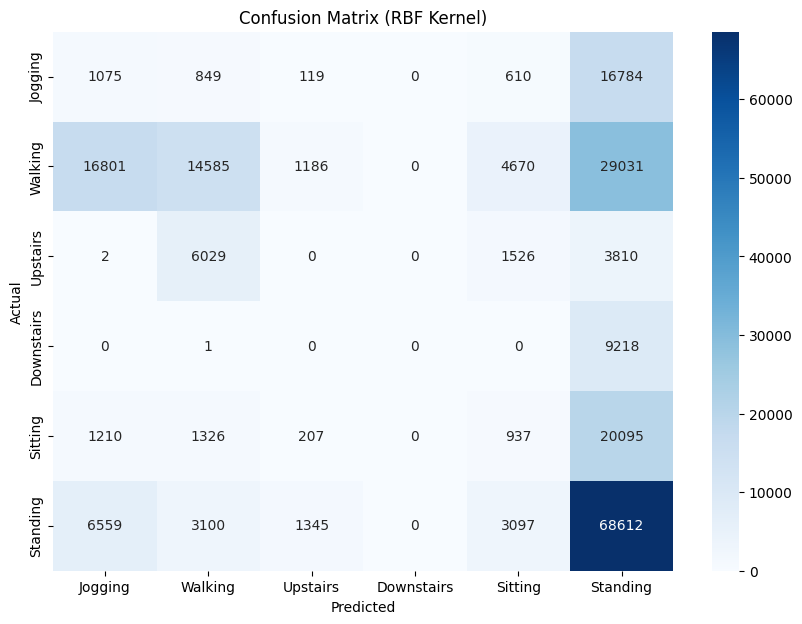

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# TRAINING SVM USING RBF KERNEL

SVM_RBF = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=42, max_iter=1000)
SVM_RBF.fit(XTrain, YTrain)

# Make predictions on the test set
y_pred_rbf = SVM_RBF.predict(XTest)

print("RBF Kernel - Accuracy Score:", accuracy_score(YTest, y_pred_rbf))
print("RBF Kernel - Classification Report:\n", classification_report(YTest, y_pred_rbf))

conf_matrix_rbf = confusion_matrix(YTest, y_pred_rbf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=data['Activity_Label'].unique(), yticklabels=data['Activity_Label'].unique())
plt.title('Confusion Matrix (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



TASK 6

In [ ]:
# Comparison of Models:

# KNN:

# Best K --> 10 with accuracy 62 %
# Time --> KNN typically has a fast training time but can be slow during predictions for large datasets due to its lazy learning nature

# K-Means Clustering :

# K-Means is an unsupervised learning
# effectiveness of clustering depends on features selected
# Accuracy of clustering approach is not a true indicator for model performance as clustering does not learn labels
# clusterings performance is measured by the confusion matrix


# SVM:

# Linear Kernel:

 # Accuracy --> 47 %
 # Time --> less time taking

# Polynomial Kernel:

  # Accuracy --> 38 %
  # Time --> more time-consuming due to polynomial transformation

# RBF Kernel:

  # Accuracy -- > 40%
  # Time --> more time-intensive compared to linear kernel


# Best Model for Accuracy -> The KNN model with largest accuracy of 62%
# Fastest Model to Train -->  The linear SVM or KNN are typically faster to train than polynomial and RBF SVM and K-Means.

# 1) Which approach do you think is best suited for this dataset and why?
# If the dataset exhibits non-linear relationships, an SVM with an RBF kernel may be best due to its ability to model complex boundaries.
# But KNN model that I modelled performed best of all with the largest accuracy of 62% with fastest predictions.

# 2) Did the clustering results match your expectations? What challenges did you face?
# K-Means struggled with clusters that were not well-separated with the actual activity labels. This is common with clustering algorithms.
# Challenges include selecting the number of clusters (k) and ensuring meaningful mapping between clusters and actual activity labels.

# 3) How could you improve these models or try other techniques to get better results?
# using techniques like GridSearchCV or RandomizedSearchCV for optimal parameter selection in SVM.
# Ensure that the SVM models are optimized for their specific kernel types.
# KNN can be effective but may need optimization when the dataset is large.
# K-Means provides insights but is inherently unsupervised.
